# NBA All Star Machine Learning Model #


This project is a machine learning project that attempts to create a model that can predict NBA All Stars as accurately as possible by using player statistics. It also aims at discovering what are the key factors in determining NBA All Star status.

The datas used in this machine learning data analysis comes from https://www.basketball-reference.com with the year and all star status columns being added by me. 

The allstar status is defined as players who played in the all star game and players who were selected as all stars but were replaced due to injury/load management.

The data includes player statistics for the past 10 NBA seasons starting at the 
2014-2015 season.

## Initial Set Up ##

In [57]:
# Importing the libraries needed to perform data cleaning and EDA on the data, 
# create the machine learning model, and run statisitcal anaysis on the results.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris  # Example dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [58]:
# Reading in the NBA Statistcs from a csv file and displaying the first 5 rows of data.
df = pd.read_csv('NBAStatisitcs.csv', encoding='latin-1')

df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,Year,All star status
0,1.0,Precious Achiuwa,PF-C,24.0,TOT,74.0,18.0,21.9,3.2,6.3,...,6.6,1.3,0.6,0.9,1.1,1.9,7.6,achiupr01,2024.0,0.0
1,2.0,Bam Adebayo,C,26.0,MIA,71.0,71.0,34.0,7.5,14.3,...,10.4,3.9,1.1,0.9,2.3,2.2,19.3,adebaba01,2024.0,1.0
2,3.0,Ochai Agbaji,SG,23.0,TOT,78.0,28.0,21.0,2.3,5.6,...,2.8,1.1,0.6,0.6,0.8,1.5,5.8,agbajoc01,2024.0,0.0
3,4.0,Santi Aldama,PF,23.0,MEM,61.0,35.0,26.5,4.0,9.3,...,5.8,2.3,0.7,0.9,1.1,1.5,10.7,aldamsa01,2024.0,0.0
4,5.0,Nickeil Alexander-Walker,SG,25.0,MIN,82.0,20.0,23.4,2.9,6.6,...,2.0,2.5,0.8,0.5,0.9,1.7,8.0,alexani01,2024.0,0.0


## Data Cleaning ##

In [59]:
# Drops columns from the dataset that are not of interest in determining key factors in NBA All Star status
df = df.drop(columns=['Player-additional', 'ORB', 'DRB', 'FT', 'FTA' ,'FT%', '2P', '2PA', '2P%', 'eFG%', 'PF', '3P', '3PA', '3P%', 'FG', 'FGA', 'Tm', 'Rk'])
df.head()



,Player,Pos,Age,G,GS,MP,FG%,TRB,AST,STL,BLK,TOV,PTS,Year,All star status
0,Precious Achiuwa,PF-C,24.0,74.0,18.0,21.9,0.501,6.6,1.3,0.6,0.9,1.1,7.6,2024.0,0.0
1,Bam Adebayo,C,26.0,71.0,71.0,34.0,0.521,10.4,3.9,1.1,0.9,2.3,19.3,2024.0,1.0
2,Ochai Agbaji,SG,23.0,78.0,28.0,21.0,0.411,2.8,1.1,0.6,0.6,0.8,5.8,2024.0,0.0
3,Santi Aldama,PF,23.0,61.0,35.0,26.5,0.435,5.8,2.3,0.7,0.9,1.1,10.7,2024.0,0.0
4,Nickeil Alexander-Walker,SG,25.0,82.0,20.0,23.4,0.439,2.0,2.5,0.8,0.5,0.9,8.0,2024.0,0.0


As seen in the cell above, a majority of the columns in the dataset are dropped due to their importance or relevance. For one, statistics unrelated to all-star status such as player-additional, team, rk, are excluded. Second, almost all efficenty statistics are removed since my goal for this project is to focus on which of the counting statistcs are most important in determining all star status. The exception to this is regular field goal percentage which I believe can offer proper insights into whether player effiecency plays a major factor in this task. 

In [60]:
# Displays the number of rows

print(df["All star status"].value_counts())

0.0    5043
1.0     266
Name: All star status, dtype: int64


In [64]:
# Created a dataset of players who averaged more than 25 ppg and played in less than 30 games and were not all stars.
injured_all_stars = df[(df["PTS"] > 25) & (df["All star status"] == 0) & (df["GS"] < 30)]
injured_all_stars


,Player,Pos,Age,G,GS,MP,FG%,TRB,AST,STL,BLK,TOV,PTS,Year,All star status
357,Ja Morant,PG,24.0,9.0,9.0,35.3,0.471,5.6,8.1,0.8,0.6,3.0,25.1,2024.0,0.0
1376,Kyrie Irving,PG,29.0,29.0,29.0,37.6,0.469,4.4,5.8,1.4,0.6,2.5,27.4,2022.0,0.0
2497,Kyrie Irving,PG,27.0,20.0,20.0,32.9,0.478,5.2,6.4,1.4,0.5,2.6,27.4,2020.0,0.0


In [65]:
# All-Stars who started in less tha 30 games
special_cases = df[(df["All star status"] == 1) & (df["GS"] < 30)]
special_cases

,Player,Pos,Age,G,GS,MP,FG%,TRB,AST,STL,BLK,TOV,PTS,Year,All star status
1098,Zion Williamson,PF,22.0,29.0,29.0,33.0,0.608,7.0,4.6,1.1,0.6,3.4,26.0,2023.0,1.0
3162,Dirk Nowitzki*,PF,40.0,51.0,20.0,15.6,0.359,3.1,0.7,0.2,0.4,0.4,7.3,2019.0,1.0
3278,Dwyane Wade*,SG,37.0,72.0,2.0,26.2,0.433,4.0,4.2,0.8,0.5,2.3,15.0,2019.0,1.0
4955,Kevin Durant,SF,26.0,27.0,27.0,33.8,0.510,6.6,4.1,0.9,0.9,2.7,25.4,2015.0,1.0


In [44]:
# Filtering out players who started in 30 or less games.
df = df[df['GS'] > 30]

# Creates two data sets, one for all stars and one for non all stars which will be used for data visualization.
all_star_df = df[df['All star status'] == 1]
non_all_star_df = df[df['All star status'] == 0]


# Displays the number of all stars vs non all stars
print(df['All star status'].value_counts())

0.0    1388
1.0     262
Name: All star status, dtype: int64


In the cell above, data cleaning is finished by filtering out players who do not meet the desired requirements to be part of this analysis. For one, players who started in less than 30 games are filtered out. This is an extremely crucial step before starting machine learning analysis. For one, this step removes players who were injured early on in the season but would have been selected for an all star otherwise. If these players were not removed, then their high averages would potentially negativly affect the model by making it predict more false positives or false negatives. It also eliminates players who saw little to no playing time and averaged very low numbers. If players who played in very little games despite not being injured were kept in dataset, the model would seem more accurate that it actually is since an all-star is definitely not going to be one of these players. 



## Data Visualization ##

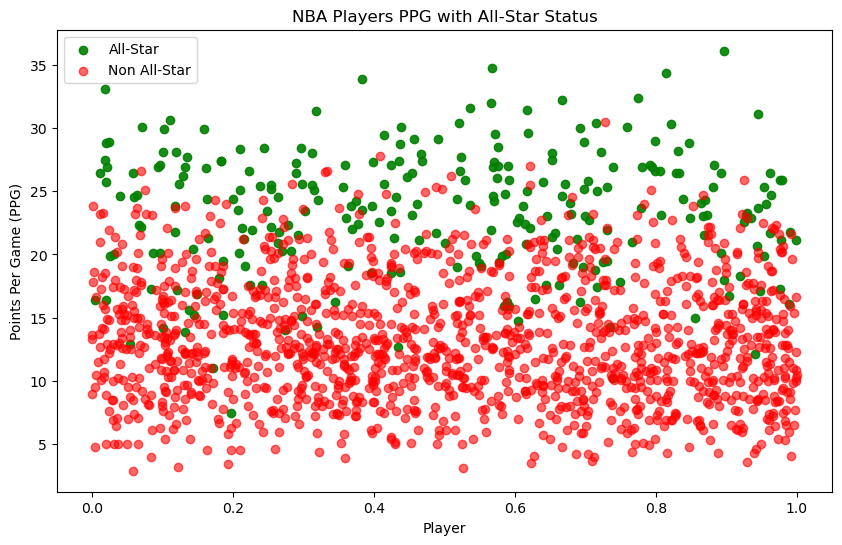

In [5]:
# Plots all players by their PPG. The points are colored based om their all star status and are spread randomly.

np.random.seed(0)  
random_x_all_star = np.random.rand(len(all_star_df))
random_x_non_all_star = np.random.rand(len(non_all_star_df))


plt.figure(figsize=(10, 6))

plt.scatter(random_x_all_star, all_star_df['PTS'], color='green', label='All-Star', alpha=0.9)

plt.scatter(random_x_non_all_star , non_all_star_df['PTS'], color='red', label='Non All-Star', alpha=0.6)

plt.xlabel('Player')
plt.ylabel('Points Per Game (PPG)')
plt.title('NBA Players PPG with All-Star Status')
plt.legend()
plt.show()

As seen in the cell above, there is a clear distinction between all stars and non all stars in PPG. The all stars heavily populate the top of the graph while the bottom is made up completely of non all stars. Interestingly, there are a few all-stars who have an average number of PPG, meaning there are other factors in determining all star status.

Text(0.5, 1.0, 'Assists Per Game with All Star Status')

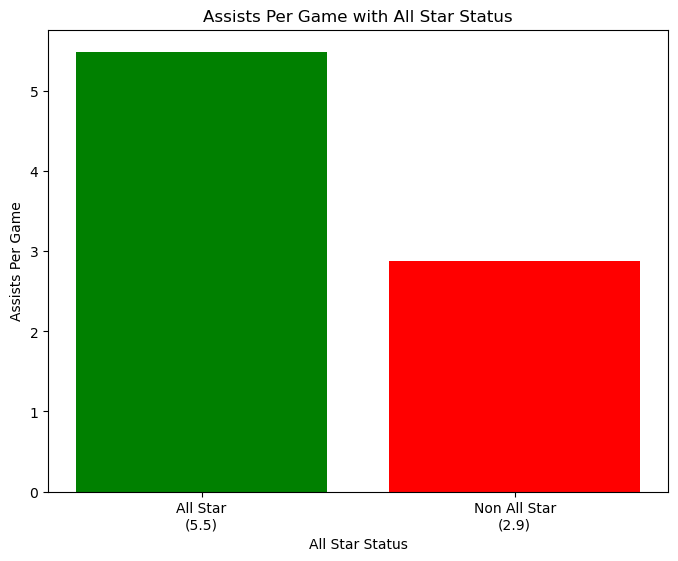

In [6]:
# Computes the average APG for all stars and non all stars then compares them via a bar graph.
avg_all_star = all_star_df.mean(numeric_only=True)
avg_non_all_star = non_all_star_df.mean(numeric_only=True)

players = ['All Star' + "\n(" + str(avg_all_star['AST'].round(1)) + ")",
           'Non All Star' + "\n(" + str(avg_non_all_star['AST'].round(1)) + ")"]
assists = [avg_all_star['AST'], avg_non_all_star['AST'] ]

plt.figure(figsize=(8, 6))

plt.bar(players, assists, color=['green', 'red'])

plt.xlabel('All Star Status')
plt.ylabel('Assists Per Game')
plt.title('Assists Per Game with All Star Status')


Text(0.5, 1.0, 'Rebounds Per Game with All Star Status')

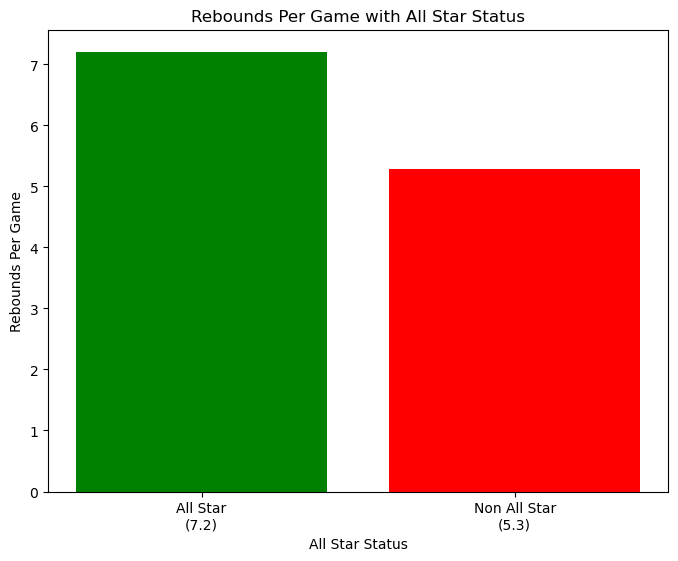

In [7]:
# Computes the average TRB for all stars and non all stars then compares them via a bar graph.

players = ['All Star' + "\n(" + str(avg_all_star['TRB'].round(1)) + ")",
           'Non All Star' + "\n(" + str(avg_non_all_star['TRB'].round(1)) + ")"]
rebounds = [avg_all_star['TRB'], avg_non_all_star['TRB'] ]

plt.figure(figsize=(8, 6))

plt.bar(players, rebounds, color=['green', 'red'])

plt.xlabel('All Star Status')
plt.ylabel('Rebounds Per Game')
plt.title('Rebounds Per Game with All Star Status')


Text(0.5, 1.0, 'Points Per Game per All Star Status')

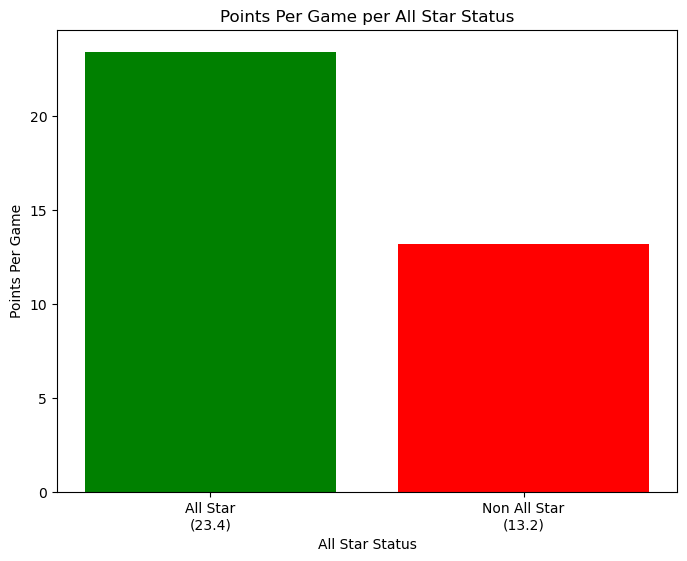

In [8]:
# Computes the average PPG for all stars and non all stars then compares them via a bar graph.

players = ['All Star' + "\n(" + str(avg_all_star['PTS'].round(1)) + ")",
           'Non All Star' + "\n(" + str(avg_non_all_star['PTS'].round(1)) + ")"]
points = [avg_all_star['PTS'], avg_non_all_star['PTS'] ]

plt.figure(figsize=(8, 6))

plt.bar(players, points, color=['green', 'red'])

# Adding labels and title
plt.xlabel('All Star Status')
plt.ylabel('Points Per Game')
plt.title('Points Per Game per All Star Status')


Text(0.5, 1.0, 'Minutes Per Game with All Star Status')

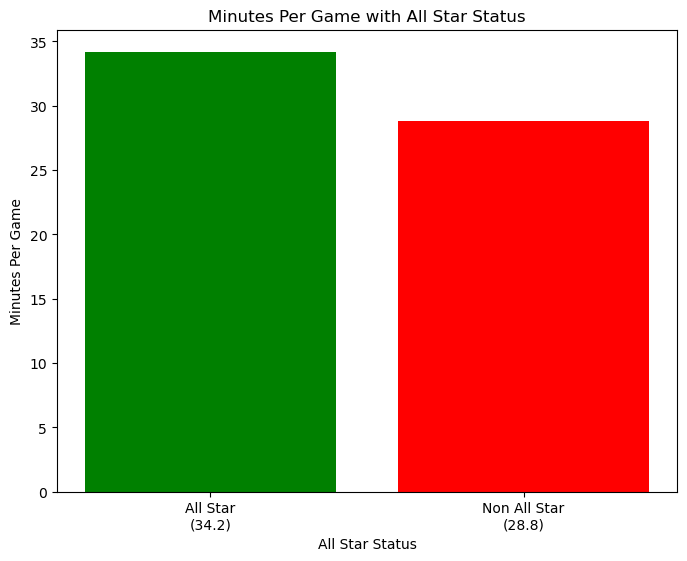

In [9]:
# Computes the average MPG for all stars and non all stars then compares them via a bar graph.

players = ['All Star' + "\n(" + str(avg_all_star['MP'].round(1)) + ")",
           'Non All Star' + "\n(" + str(avg_non_all_star['MP'].round(1)) + ")"]
points = [avg_all_star['MP'], avg_non_all_star['MP'] ]

plt.figure(figsize=(8, 6))

plt.bar(players, points, color=['green', 'red'])

# Adding labels and title
plt.xlabel('All Star Status')
plt.ylabel('Minutes Per Game')
plt.title('Minutes Per Game with All Star Status')


## Creating and Running the Random Forest

In [10]:
# Define the features to be used in the RandomForestClassifier and split the data into training and testing data.

features = ["PTS", "AST" ,"TOV", "TRB", "FG%", "STL", "BLK"]

X = df[features]
y = df["All star status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Following experimentation with adjusting which features to train the model with. The set that leads with the best results is all the numerical fields except for games. The data that suprised me to the most to have a positive effect is age, especially since it is not a basketball statistic. However, it does make sense upon further reflection as since all star players are voted by the general audiance, it is common for veterans who are out of their prime but where once former superstars or successful players to make an all star without being on that level currently. A few examples include Chris Paul and Draymond Green. The reverse can be common as well where rookies who may not be on an all star level yet but show promise for the future gain populariy and make all star. An example of this can be seen in Lamelo Ball who made all star their sophomore year despite having below average statistics for an all star.

In [11]:
# Initialize and train the model then evaluate the accuaracy.
# Repeated with 30 different random states with the average being displayed.

results = []

for i in range(30):
    rf_model = RandomForestClassifier(random_state=i)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    results.append(accuracy_score(y_test, y_pred))

accuracy = sum(results) / len(results)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.91


The RandomForestClassifier yielded a 95% accuaracy, showing great success in determining all star status. Below we will use more advanced metrics to fully analyze the results. 

## Analyzing Results ##

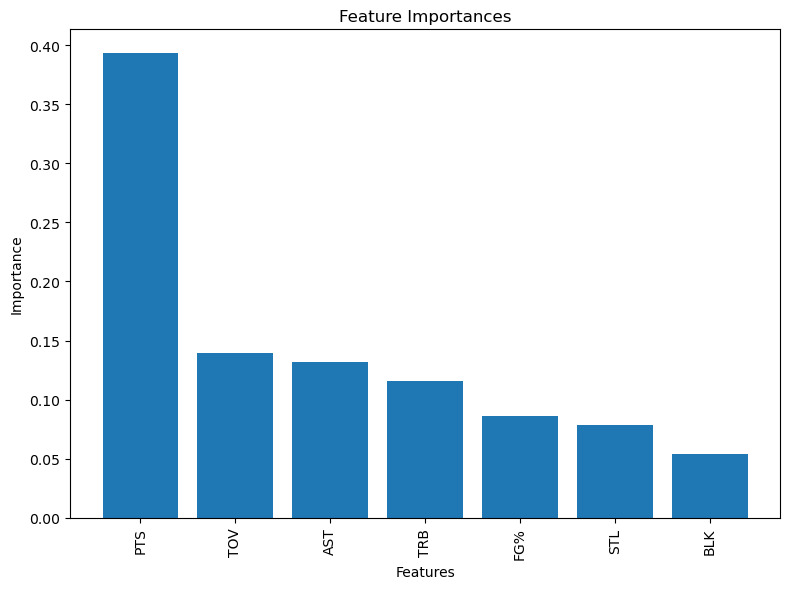

In [12]:
# Creates a bar graph showing the importance values of each feature.

importances = rf_model.feature_importances_
feature_names = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

To start off, we examine the feature importance values for every statistic. Unsuprisngly, points per game is the stand out metric with almost a .30 feature importance. This makes complete sense as fans are most interesting in scoring and the all star vote is by fans. Suprisngly, turnovers are the second most important feature in determining all star status, and by a large margin too. It is common for all stars to have high turnover rates due to having the ball for greater amount of time than role or bench players; however, the results are still unexpected. The rest of the statistics follow a gradual decrease in importance.

In [13]:
# Prints the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[268   9]
 [ 20  33]]


As seen in the confusion matrix, the model correctly predicts 112 non all stars and 14 all stars. The model predicts two players to be non all stars who are actually all stars and predicts five players to be all stars who are non all stars. This shows the model is overall very accurate with its weakest point being false positives. 

In [14]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       277
         1.0       0.79      0.62      0.69        53

    accuracy                           0.91       330
   macro avg       0.86      0.80      0.82       330
weighted avg       0.91      0.91      0.91       330



Here is the classification report

In [15]:
# Runs a cross-validation score and prints the results

scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores.round(2))
print("Mean accuracy:", scores.mean().round(2))

Cross-validation scores: [0.92 0.91 0.92 0.9  0.9 ]
Mean accuracy: 0.91


Here is the cross validation score

# Analyzing Effect of Position

## Data Cleaning

In [16]:
df["Pos"].value_counts()

C        340
PG       333
SG       331
PF       317
SF       302
SF-SG      6
PG-SG      5
SG-PG      5
PF-SF      4
C-PF       2
PF-C       2
SF-PF      2
SG-SF      1
Name: Pos, dtype: int64

In [17]:
#Convert all players to one position by taking just the primary position.

df.loc[df['Pos'] == 'SF-SG', 'Pos'] = 'SF'
df.loc[df['Pos'] == 'PG-SG', 'Pos'] = 'PG'
df.loc[df['Pos'] == 'SG-PG', 'Pos'] = 'SG'
df.loc[df['Pos'] == 'PF-SF', 'Pos'] = 'PF'
df.loc[df['Pos'] == 'C-PF', 'Pos'] = 'C'
df.loc[df['Pos'] == 'PF-C', 'Pos'] = 'PF'
df.loc[df['Pos'] == 'SF-PF', 'Pos'] = 'SF'
df.loc[df['Pos'] == 'SG-SF', 'Pos'] = 'SG'
df["Pos"].value_counts()

C     342
PG    338
SG    337
PF    323
SF    310
Name: Pos, dtype: int64

In [18]:
# Creates two data sets, one for front court players and one for back court players.

df_frontcourt = df[(df["Pos"] == "C") | (df["Pos"] == "PF") | (df["Pos"] == "SF")]
df_backcourt = df[(df["Pos"] == "PG") | (df["Pos"] == "SG")]

## Visualizations

## Analysis of Frontcourt Players

In [19]:
# Create and run a Random Forest Classifier for front court players and display the accuaracy.

X_front = df_frontcourt[features]
y_front = df_frontcourt["All star status"]
X_train, X_test, y_train, y_test = train_test_split(X_front, y_front, test_size=0.20, random_state=42)

results = []

for i in range(30):
    rf_model = RandomForestClassifier(random_state=i)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    results.append(accuracy_score(y_test, y_pred))

accuracy = sum(results) / len(results)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.94


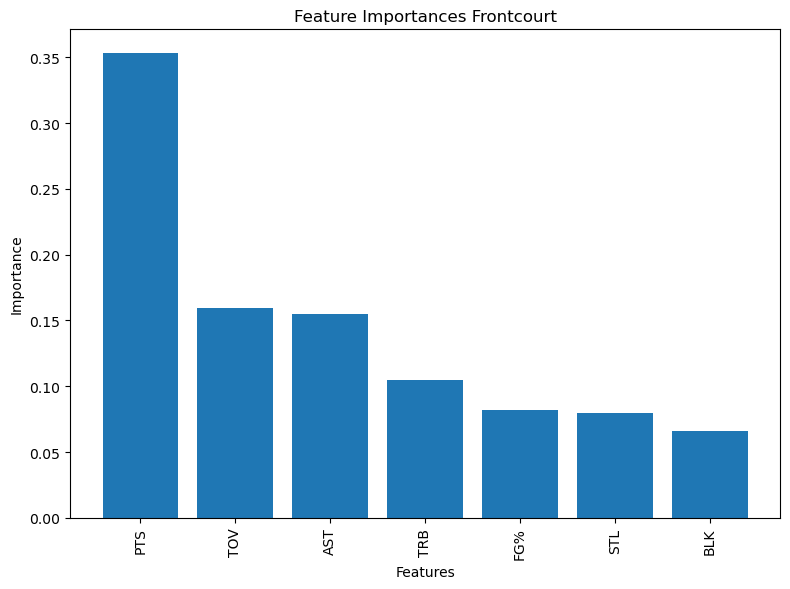

In [20]:
# Display feature importances
importances = rf_model.feature_importances_
feature_names = X_front.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(8, 6))
plt.title("Feature Importances Frontcourt")
plt.bar(range(X_front.shape[1]), importances[indices], align="center")
plt.xticks(range(X_front.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [21]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       176
         1.0       0.67      0.74      0.70        19

    accuracy                           0.94       195
   macro avg       0.82      0.85      0.83       195
weighted avg       0.94      0.94      0.94       195



In [22]:
# Prints the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[169   7]
 [  5  14]]


In [23]:
# Runs a cross-validation score and prints the results

scores = cross_val_score(rf_model, X_front, y_front, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores.round(2))
print("Mean accuracy:", scores.mean().round(2))

Cross-validation scores: [0.93 0.92 0.93 0.92 0.91]
Mean accuracy: 0.92


## Analysis of Backcourt Players

In [24]:
# Create and run a Random Forest Classifier for back court players and display the accuaracy.

X_back = df_backcourt[features]
y_back = df_backcourt["All star status"]
X_train, X_test, y_train, y_test = train_test_split(X_back, y_back, test_size=0.20, random_state=42)

results = []

for i in range(30):
    rf_model = RandomForestClassifier(random_state=i)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    results.append(accuracy_score(y_test, y_pred))
    

accuracy = sum(results) / len(results)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


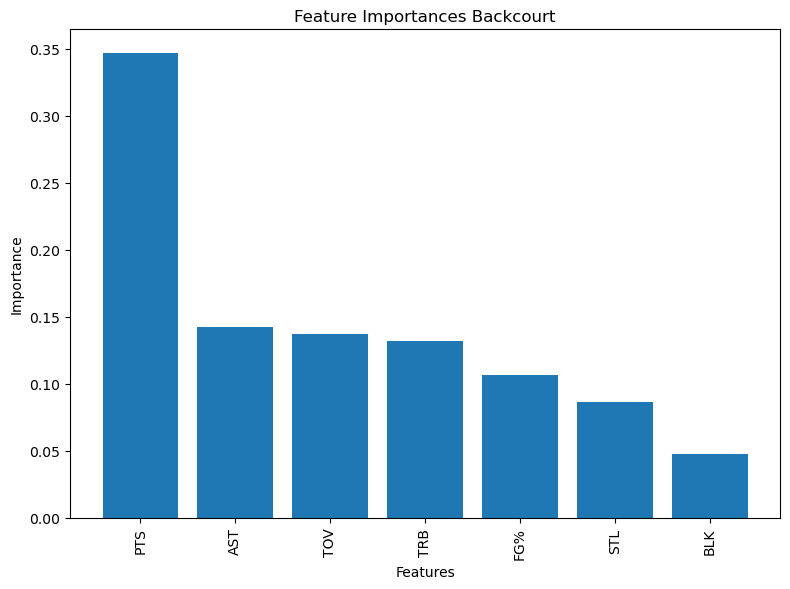

In [25]:
# Display feature importances

importances = rf_model.feature_importances_
feature_names = X_back.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(8, 6))
plt.title("Feature Importances Backcourt")
plt.bar(range(X_back.shape[1]), importances[indices], align="center")
plt.xticks(range(X_back.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [26]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       111
         1.0       0.95      0.75      0.84        24

    accuracy                           0.95       135
   macro avg       0.95      0.87      0.90       135
weighted avg       0.95      0.95      0.95       135



In [27]:
# Prints the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[110   1]
 [  6  18]]


In [28]:
# Runs a cross-validation score and prints the results

scores = cross_val_score(rf_model, X_back, y_back, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores.round(2))
print("Mean accuracy:", scores.mean().round(2))

Cross-validation scores: [0.9  0.91 0.89 0.87 0.89]
Mean accuracy: 0.89


# Analyzing Effect of Era

## Visualizations

## Analysis of Pre Covid Era

In [29]:
# Create two datasets, one for the 5 seasons pre covid and one for the 5 seasons post covid.
df_precovid = df[(df["Year"] > 2019)]
df_postcovid = df[(df["Year"] <= 2019)]

In [30]:
# Create and run a Random Forest Classifier for pre covid seasons and display the accuaracy.

X_precovid = df_precovid[features]
y_precovid = df_precovid["All star status"]
X_train, X_test, y_train, y_test = train_test_split(X_precovid, y_precovid, test_size=0.20, random_state=42)


results = []

for i in range(30):
    rf_model = RandomForestClassifier(random_state=i)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    results.append(accuracy_score(y_test, y_pred))

accuracy = sum(results) / len(results)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


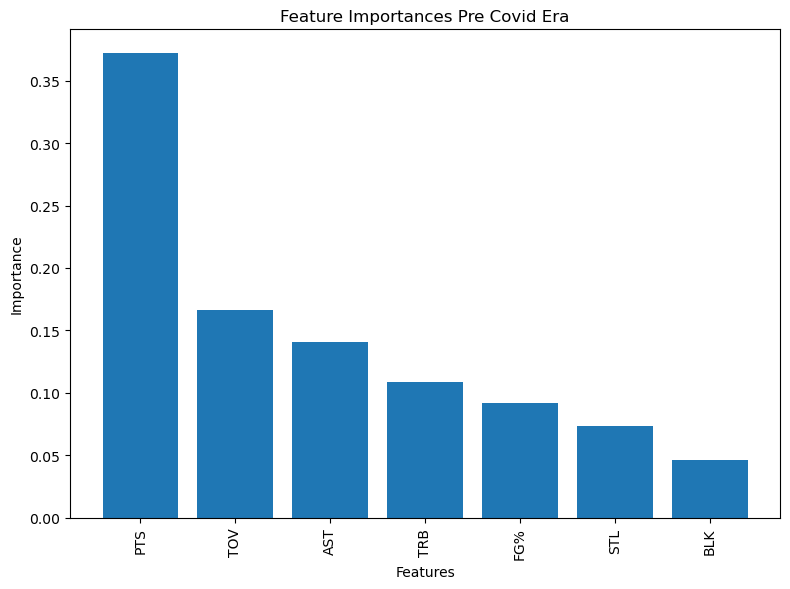

In [31]:
# Display features importances
importances = rf_model.feature_importances_
feature_names = X_precovid.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(8, 6))
plt.title("Feature Importances Pre Covid Era")
plt.bar(range(X_precovid.shape[1]), importances[indices], align="center")
plt.xticks(range(X_precovid.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [32]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       135
         1.0       0.75      0.52      0.61        29

    accuracy                           0.88       164
   macro avg       0.83      0.74      0.77       164
weighted avg       0.88      0.88      0.88       164



In [33]:
# Prints the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[130   5]
 [ 14  15]]


In [34]:
# Runs a cross-validation score and prints the results

scores = cross_val_score(rf_model, X_precovid, y_precovid, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores.round(2))
print("Mean accuracy:", scores.mean().round(2))

Cross-validation scores: [0.9  0.93 0.88 0.93 0.9 ]
Mean accuracy: 0.91


## Analysis of Post Covid Era

In [35]:
# Create and run a Random Forest Classifier for post covid seasons and display the accuaracy.

X_postcovid = df_postcovid[features]
y_postcovid = df_postcovid["All star status"]
X_train, X_test, y_train, y_test = train_test_split(X_postcovid, y_postcovid, test_size=0.20, random_state=42)


results = []

for i in range(30):
    rf_model = RandomForestClassifier(random_state=i)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    results.append(accuracy_score(y_test, y_pred))

accuracy = sum(results) / len(results)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


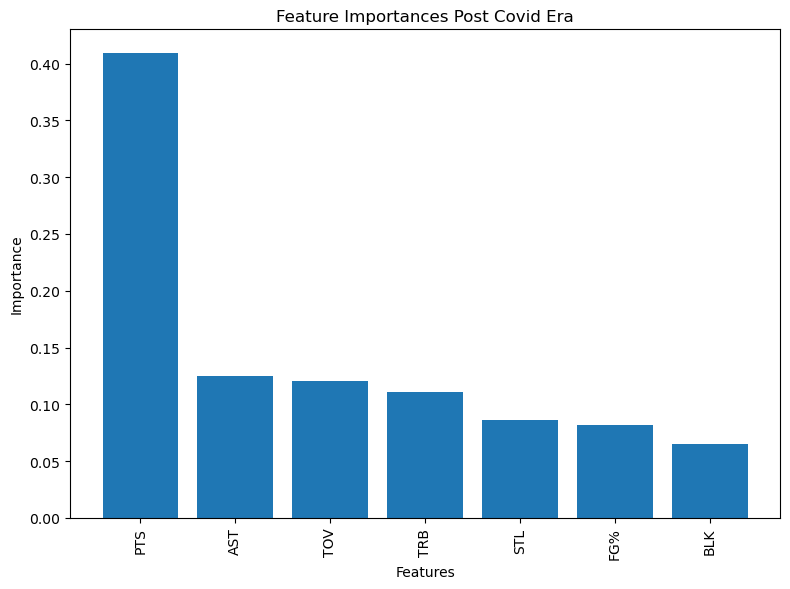

In [36]:
# Display feature importances

importances = rf_model.feature_importances_
feature_names = X_postcovid.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(8, 6))
plt.title("Feature Importances Post Covid Era")
plt.bar(range(X_postcovid.shape[1]), importances[indices], align="center")
plt.xticks(range(X_postcovid.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [37]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       145
         1.0       0.88      0.68      0.77        22

    accuracy                           0.95       167
   macro avg       0.92      0.83      0.87       167
weighted avg       0.94      0.95      0.94       167



In [38]:
# Prints the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[143   2]
 [  7  15]]


In [39]:
# Runs a cross-validation score and prints the results

scores = cross_val_score(rf_model, X_postcovid, y_postcovid, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores.round(2))
print("Mean accuracy:", scores.mean().round(2))

Cross-validation scores: [0.93 0.95 0.92 0.93 0.92]
Mean accuracy: 0.93
